# Analise de dados - Twitter

Este notebook tem como objetivo demostrar uma análise exploratória com base em dados obtidos pelo Twitter.

## Carregamento dos dados

Vamos fazer o import das dependências e o import do dataset sobre os twitters referentes ao covid.

In [1]:
import pandas as pd
import seaborn as sns
import wordcloud as wc
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('./datasets/corona.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.head()

,name,description,created_at,text,location,retweeted,owner_name,owner_location,owner_created_at,retweeted_count
0,lore de áries,"Sofrendo por séries e casais desde 1997 , fã d...",Mon Feb 01 14:05:37 +0000 2021,"RT @drysanaoliveira: Não bastando a pandemia, ...",Grey Sloan Memorial Hospital,True,Capitu,"Manaus, Brasil",Mon Feb 01 01:49:23 +0000 2021,5.0
1,_ouriki_ツ,n me julgue :v,Mon Feb 01 14:05:37 +0000 2021,@videovergonhakk O meu filho n toma vacina é t...,NaN,False,NaN,NaN,NaN,NaN
2,Pablo Verdolaga 🇧🇷,PERFIL FOCADO EM ASSUNTOS POLÍTICOS E OPINIÕES...,Mon Feb 01 14:05:38 +0000 2021,RT @brunaobarreto3: Não pode:\n\n- Nomear como...,Brasil 🇧🇷,True,Brunão,NaN,Mon Feb 01 12:23:00 +0000 2021,115.0
3,kátia mano,"Dentista, crocheteira, mãe, atéia, petista e s...",Mon Feb 01 14:05:38 +0000 2021,@roberta_bastoss Eu acredito. Mas a diferença...,"Copacabana, Rio de Janeiro",False,NaN,NaN,NaN,NaN
4,carolina,777,Mon Feb 01 14:05:38 +0000 2021,eu e os meus amigos em 2075 quando finalmente ...,NaN,False,NaN,NaN,NaN,NaN


## Análise dos dados

Vamos fazer uma análise sobre as informações que temos nesse dataset a fim de descobrir algumas informações interessantes sobre os posts.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1142 non-null   object 
 1   description       918 non-null    object 
 2   created_at        1142 non-null   object 
 3   text              1142 non-null   object 
 4   location          723 non-null    object 
 5   retweeted         1142 non-null   bool   
 6   owner_name        654 non-null    object 
 7   owner_location    421 non-null    object 
 8   owner_created_at  654 non-null    object 
 9   retweeted_count   654 non-null    float64
dtypes: bool(1), float64(1), object(8)
memory usage: 81.5+ KB


In [5]:
df.describe()

,retweeted_count
count,654.000000
mean,281.102446
std,682.289145
min,1.000000
25%,5.000000
50%,37.000000
75%,295.000000
max,6202.000000


## Twittes e ReTwittes

Vamos separar a base de dados em post feitos e re-enviados por outros usuários.

In [6]:
retweeted = df.loc[df['retweeted'] == True]
tweeted = df.loc[df['retweeted'] == False]

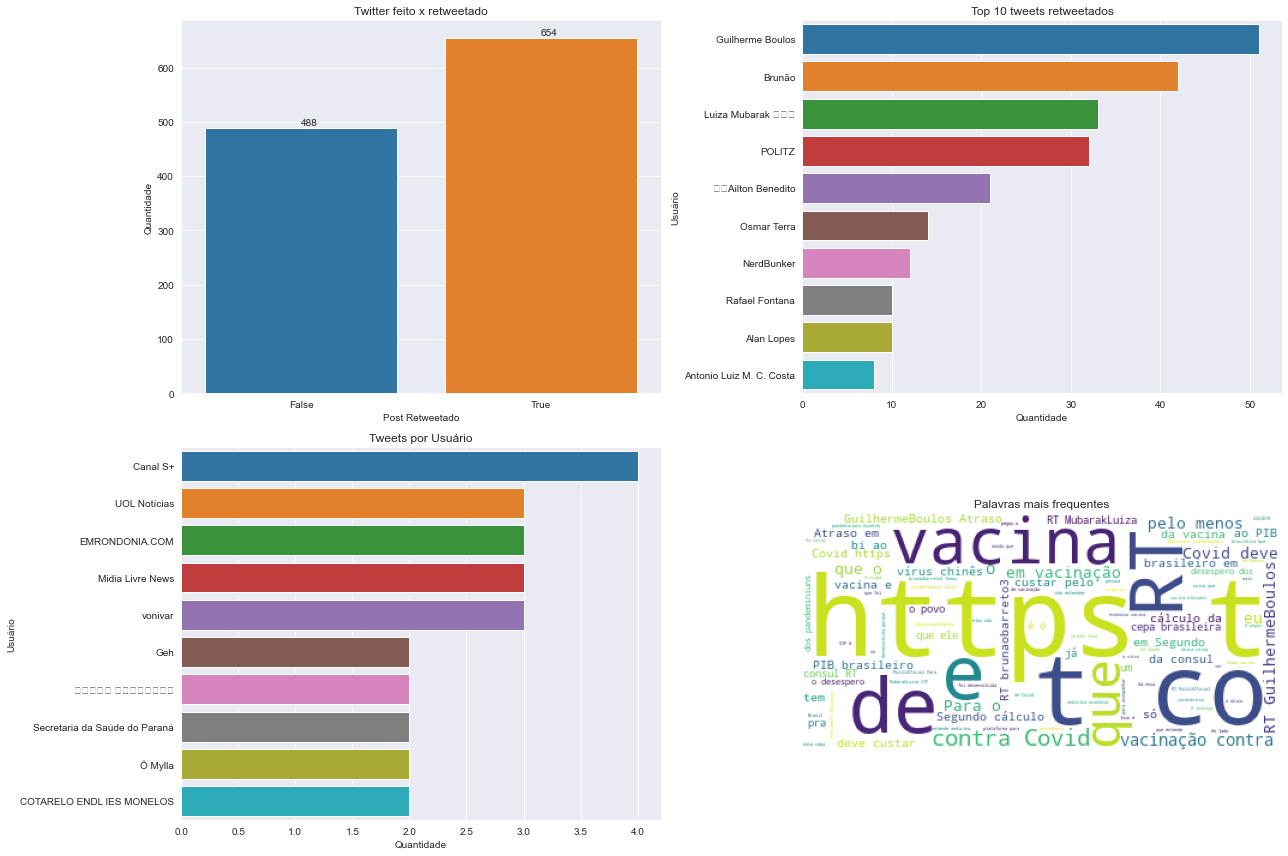

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(18,12))
sns.countplot(x='retweeted', data=df, ax=ax[0][0])
ax[0][0].set(title='Twitter feito x retweetado', xlabel='Post Retweetado', ylabel='Quantidade')

for p in ax[0][0].patches:
    ax[0][0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5))

sns.countplot(y='owner_name', data = retweeted, order=retweeted['owner_name'].value_counts().iloc[0:10].index, ax=ax[0][1])
ax[0][1].set(title='Top 10 tweets retweetados', ylabel='Usuário', xlabel='Quantidade')

sns.countplot(y='name', data = tweeted, order=tweeted['name'].value_counts().iloc[0:10].index, ax=ax[1][0])
ax[1][0].set(title='Tweets por Usuário', ylabel='Usuário', xlabel='Quantidade')

cloud = wc.WordCloud(max_words=100, background_color='white')
cloud = cloud.generate(df['text'].str.cat(sep='\n'))
ax[1][1].imshow(cloud)
ax[1][1].axis('off')
ax[1][1].set_title('Palavras mais frequentes')

plt.tight_layout()
plt.show()

## Localização dos twittes feitos

Vamos procurar entender em quais regiões os posts estão acontecendo com mais frequência

In [8]:
locations = df.loc[df['location'].isna() == False][['location']]
locations

,location
0,Grey Sloan Memorial Hospital
2,Brasil 🇧🇷
3,"Copacabana, Rio de Janeiro"
7,"Lisboa, Portugal"
8,"Lisboa, Portugal"
...,...
1134,Ouro Preto - MG Brasil
1135,Fortaleza/CE
1136,"Rio de Janeiro, Brasil"
1139,"Manaus, Brasil"


In [9]:
locations.value_counts().head(30)

location              
Brasil                    49
São Paulo, Brasil         38
Rio de Janeiro, Brasil    31
Lisboa, Portugal          14
Portugal                  11
São Paulo                 11
Brazil                    10
Salvador, Brasil           9
Rio de Janeiro             9
Manaus, Brasil             8
Brasília                   8
Brasília, Brasil           8
Sao Paulo, Brazil          8
Belo Horizonte, Brasil     8
Porto Alegre, Brasil       6
Vitória, Brasil            5
Belo Horizonte             5
Curitiba, Brasil           5
Belém, Brasil              4
Lisbon                     4
Niterói, Brasil            3
Santa Catarina, Brasil     3
Ceará, Brasil              3
Recife, Brasil             3
BRASIL                     3
Porto Velho, Rondônia      3
Lisbon, Portugal           3
Paraná, Brasil             3
Goiânia, Goiás, Brasil     3
Juiz de Fora MG Brasil     3
dtype: int64

### Pré-processamento

Vamos agora pré-processar as localizações a fim de transformar o texto em uma matriz, para assim, poder agrupar os registros semelhantes.

A função `process´ ira receber uma frase e efetuará as seguintes etapas:

* Tokenização: Quebrar a frase em palavras

* Stop Words: Remover as palavras da frase que não agregam valor ao processamento, como: ou, se, então...

* Stemmer: Reduz a palavra ao seu radical, levando-a assim a sua raiz para facilitar o processamento e comparação entre varios textos.

Logo após o pre-processamento, outras tratativas são feitas, como:

* Vetorização: Converte os textos que foram processados anteriormente em uma matriz de frequência, utilizando o algoritmo TF-ID.

* TruncateSVD: Transforma a matriz em um modelo de dimensão reduzida.

* KMeans: Agrupa os registros gerados pelo TruncateSVD de acordo com a distancian/similariedade entre os dados.

Por fim, os dados podem ser rotulados de acordo com o grupos em que foram classificados e validados.

In [10]:
import nltk

nltk.download('punkt')
language = 'portuguese'

stop_words = nltk.corpus.stopwords.words(language)
stemmer = nltk.stem.RSLPStemmer()

def process(text: str) -> str:
    words = nltk.tokenize.word_tokenize(text, language=language)
    words = [stemmer.stem(word) for word in words if (word not in stop_words 
                                                      and word.isalpha())]
    return ' '.join(words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
process('Hoje eu vou jogar asteroids com minha irmazinha de 9 anos!!')

'hoj vou jog asteroid irm ano'

In [12]:
locations['location_process'] = locations['location'].apply(process)

In [13]:
import numpy as np
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
vectorize = tfidf.fit_transform(locations['location_process'])

svd = TruncatedSVD(n_components=2)
vetor_svd = svd.fit_transform(vectorize)

#### Quantidade de grupos

Vamos procurar identificar quantos grupos poderemos estar utilizando para agrupar os dados e assim ter uma relação que melhor agrupe os posts.

Para isso vamos estar utilizando a métrica de $silhouette_score$ que nos da um valor entre -1 e 1, sendo:

* -1: indica que uma amostra esta muito próxima de outros grupos.

* 0: indica que os grupos podem estar se sobrepondo

* 1: indica que a amostra está a uma distância consideravel de outros grupos.

Para n_clusters = 2 A média do silhouette_score é : 0.6753524745198618
Para n_clusters = 3 A média do silhouette_score é : 0.7456263934897358
Para n_clusters = 4 A média do silhouette_score é : 0.7255419796989849
Para n_clusters = 5 A média do silhouette_score é : 0.776136282831577
Para n_clusters = 6 A média do silhouette_score é : 0.8035889575789646
Para n_clusters = 7 A média do silhouette_score é : 0.8182036496952515
Para n_clusters = 8 A média do silhouette_score é : 0.8353982940667519
Para n_clusters = 9 A média do silhouette_score é : 0.843096618381304
Para n_clusters = 10 A média do silhouette_score é : 0.8001114069354306
Para n_clusters = 11 A média do silhouette_score é : 0.8068801009101514
Para n_clusters = 12 A média do silhouette_score é : 0.8005309896174834


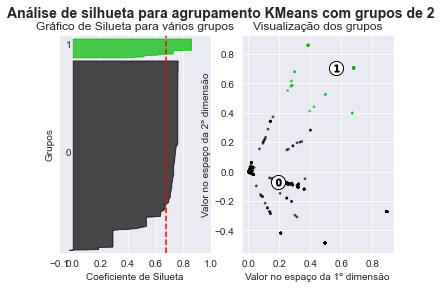

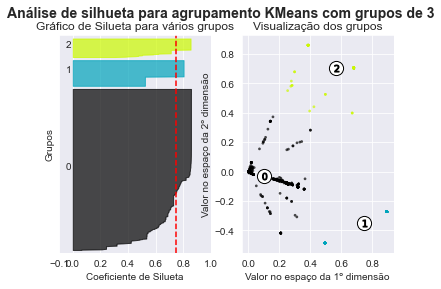

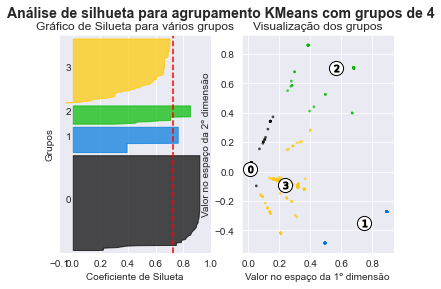

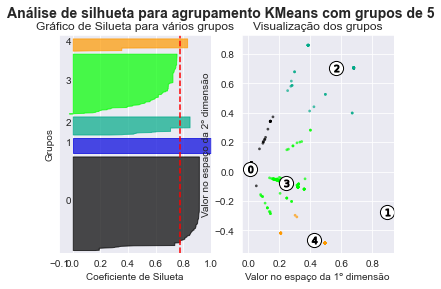

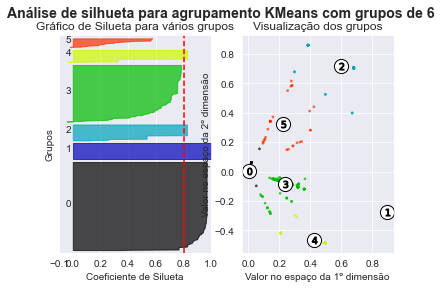

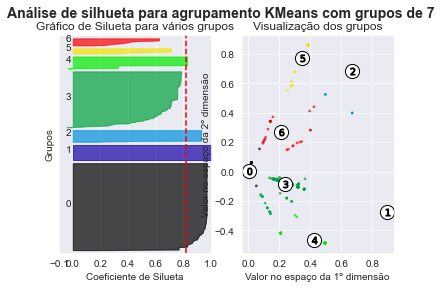

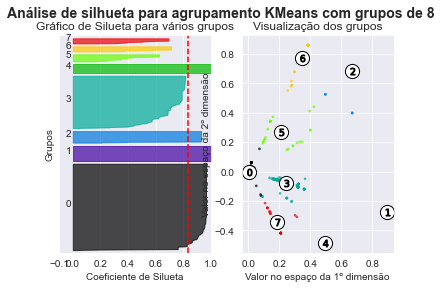

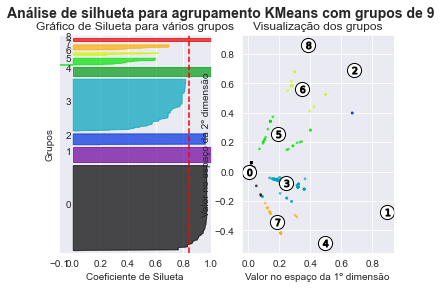

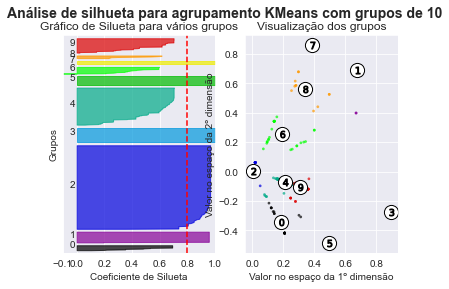

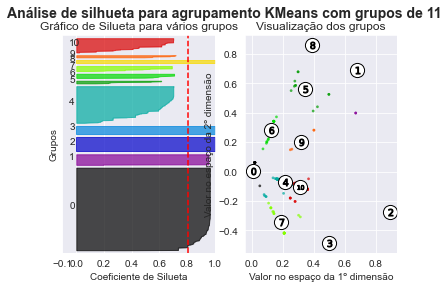

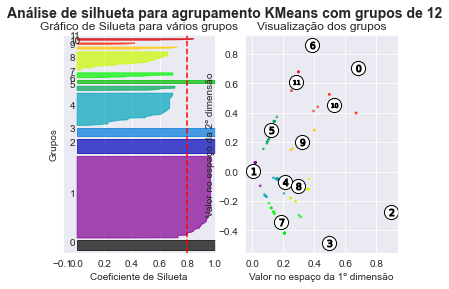

In [14]:
clusters = range(2, 13)

for n_cluster in clusters:

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig.set_inches_size=(18,7)

    ax1.set_xlim([-.1, 1])
    ax1.set_ylim([0, len(vetor_svd) + (n_cluster + 1) * 10])

    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    labels = kmeans.fit_predict(vetor_svd)

    silhouette_avg = silhouette_score(vetor_svd, labels)
    sample_silhouette_values = silhouette_samples(vetor_svd, labels)

    print("Para n_clusters =", n_cluster,  "A média do silhouette_score é :", silhouette_avg)

    y_lower = 10
    for i in range(n_cluster):
        index_silhouette_values = sample_silhouette_values[labels == i]
        index_silhouette_values.sort()

        size_cluster_i = index_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, index_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title('Gráfico de Silueta para vários grupos')
    ax1.set_xlabel('Coeficiente de Silueta')
    ax1.set_ylabel('Grupos')

    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0., 0.2, 0.4, 0.6, 0.8, 1])


    colors = cm.nipy_spectral(labels.astype(float) / n_cluster)
    ax2.scatter(vetor_svd[:, 0], vetor_svd[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    centers = kmeans.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:,1], marker='o', c='white', alpha=1, s = 200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title('Visualização dos grupos')
    ax2.set_xlabel('Valor no espaço da 1º dimensão')
    ax2.set_ylabel('Valor no espaço da 2º dimensão')

    plt.suptitle(('Análise de silhueta para agrupamento KMeans com grupos de %d' % n_cluster), fontsize=14, fontweight='bold')
plt.show()

Com base nos scores dos grupos, optei por utilizar  a quantidade de nove grupos pois apresenta o melhor score: 0.843096618381304

In [15]:
kmeans = KMeans(n_clusters=9, random_state=0)
labels = kmeans.fit_predict(vetor_svd)

In [16]:
labels

array([4, 2, 0, 4, 4, 4, 5, 5, 5, 4, 4, 4, 5, 5, 4, 5, 4, 5, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 3, 4, 4, 4, 5, 1, 4, 4, 5, 0, 8, 5, 5, 2, 4, 4,
       4, 4, 4, 4, 1, 0, 6, 5, 3, 4, 1, 6, 4, 5, 8, 2, 4, 4, 4, 0, 5, 0,
       5, 4, 4, 1, 4, 4, 4, 5, 4, 5, 4, 4, 7, 5, 4, 4, 4, 2, 1, 5, 4, 5,
       4, 4, 4, 4, 1, 4, 2, 4, 4, 4, 5, 4, 5, 4, 5, 3, 4, 4, 2, 4, 5, 5,
       4, 4, 8, 0, 0, 4, 4, 4, 4, 5, 5, 5, 0, 1, 5, 4, 5, 5, 4, 6, 2, 4,
       4, 4, 5, 4, 4, 4, 2, 5, 5, 5, 4, 0, 4, 4, 4, 1, 4, 5, 4, 4, 0, 5,
       8, 5, 5, 4, 4, 5, 4, 8, 1, 2, 4, 4, 0, 4, 4, 4, 2, 2, 4, 5, 6, 2,
       4, 4, 5, 4, 2, 4, 1, 2, 5, 4, 5, 3, 4, 5, 4, 4, 4, 6, 7, 3, 4, 4,
       5, 4, 4, 2, 3, 4, 5, 4, 1, 4, 4, 5, 2, 5, 4, 4, 4, 4, 5, 4, 4, 5,
       4, 5, 5, 4, 4, 5, 4, 4, 4, 6, 5, 4, 5, 6, 4, 4, 4, 4, 5, 7, 5, 5,
       4, 8, 4, 2, 3, 0, 3, 4, 4, 4, 5, 5, 4, 4, 4, 2, 1, 1, 4, 4, 5, 4,
       4, 5, 2, 0, 5, 4, 4, 5, 4, 5, 8, 5, 4, 6, 5, 2, 7, 4, 4, 5, 5, 5,
       4, 4, 4, 4, 2, 4, 4, 4, 5, 5, 5, 4, 4, 4, 4,

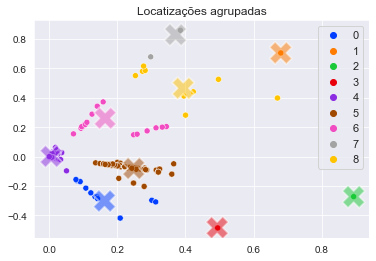

In [17]:
plt.title('Locatizações agrupadas')
palette = sns.color_palette('bright', len(set(labels)))
sns.set(rc={'figure.figsize': (12, 8)})
sns.scatterplot(vetor_svd[:,0], vetor_svd[:,1], hue=labels, palette=palette)
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c=palette, s=500, alpha=0.5, marker='X')
plt.show()

In [18]:
locations['cluster'] = labels

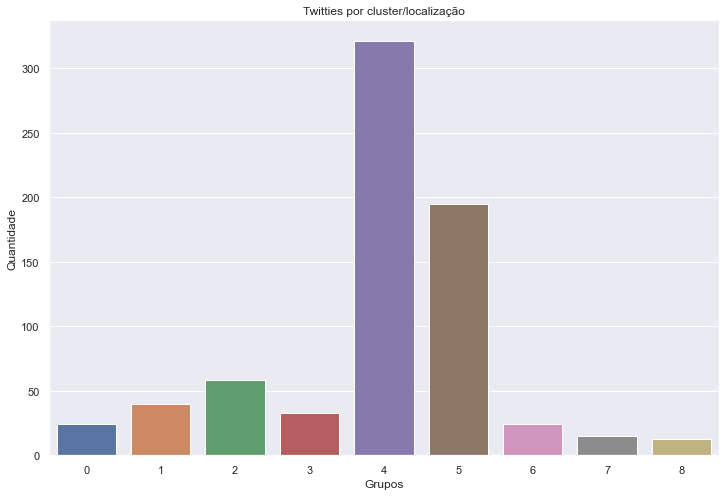

In [19]:
sns.countplot(x='cluster', data=locations).set(title='Twitties por cluster/localização', xlabel='Grupos', ylabel='Quantidade')
plt.show()

In [20]:
from IPython.core.display import display, HTML

for key, group in locations.groupby(['cluster']):
    display(HTML(f'<h1> Cluster: {key}</h1>'))
    display(HTML(f'<h3> Quantidade de  registros {len(group)}</h3>'))
    display(HTML('</br>'))

    display(HTML('<ul>'))
    for subkey, subgGroup in group.groupby(['location']):
        display(HTML(f'<li>{subkey} - {len(subgGroup)}</li>'))
    display(HTML('</ul>'))

Podemos perceber que o grupo 4 e 5 possuem uma maior quantidade de registros, no entanto os dados pertencentes a eles estão muito mesclados, indicando talvés que necessitamos melhorar ainda mais o processamento da informação na etapa de pré-processamento. Vale resaltar também que os outros grupos possuem uma maior coerrência nas informações.